# Programma dimostrativo sulla regressione circolare

Genera una rappresentazione grafica dei punti "sperimentali" ottenuti inserendo una componente random e, tramite una regressione circolare, fornisce la circonferenza ottimale e relativo centro e raggio

14/07/2020
*Lorenzo*

In [1]:
# librerie necessarie
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
# definizioni delle varie funzioni
def calc_R(x, y, xc, yc):
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f(c, x, y):
    Ri = calc_R(x, y, *c)
    return Ri - Ri.mean()

def least_squares_circle(coords):
    x, y = None, None
    if isinstance(coords, np.ndarray):
        x = coords[:, 0]
        y = coords[:, 1]
    elif isinstance(coords, list):
        x = np.array([point[0] for point in coords])
        y = np.array([point[1] for point in coords])
    else:
        raise Exception(
            "Il parametro 'coords' è di un tipo non supportato: " + str(type(coords)))

    # coordinate del baricentro
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, _ = optimize.leastsq(f, center_estimate, args = (x, y))
    xc, yc = center
    Ri = calc_R(x, y, *center)
    R = Ri.mean()
    residui = np.sum((Ri - R)**2)
    return xc, yc, R, residui

def ptsCirconferenzaOttimale(xc, yc, R):
    alfa = np.linspace(-np.pi, np.pi, 180)
    xp = xc + R*np.cos(alfa)
    yp = yc + R*np.sin(alfa)
    return xp, yp

Di seguito viene chiesto di inserire il numero di dati "sperimentali" e quindi il valore massimo di scarto random con il quale costruire i punti a partire da una circonferenza di centro origine e raggio unitario.

In [3]:
# Inizio programma
numPts = int(input('inserire il numero di punti: '))
maxScostamento = float(input("inserire il valore (assoluto) massimo dell'errore (per es. 0.1): "))

In [4]:
rng = np.random.default_rng()
indiceVertici = np.arange(numPts)
xdata = []
ydata = []
for i in indiceVertici:
    alfa = 2*np.pi*rng.random()
    deltaRnd = 2*maxScostamento*rng.random() - maxScostamento
    xdata = np.append(xdata, (1 + deltaRnd)*np.cos(alfa))
    ydata = np.append(ydata, (1 + deltaRnd)*np.sin(alfa))

coords = np.transpose([xdata, ydata])
xc, yc, r, sQuad = least_squares_circle(coords)
residuo = np.sqrt(sQuad)

Avviare 2 volte la cella sottostante per ottenere un'immagine adeguata.

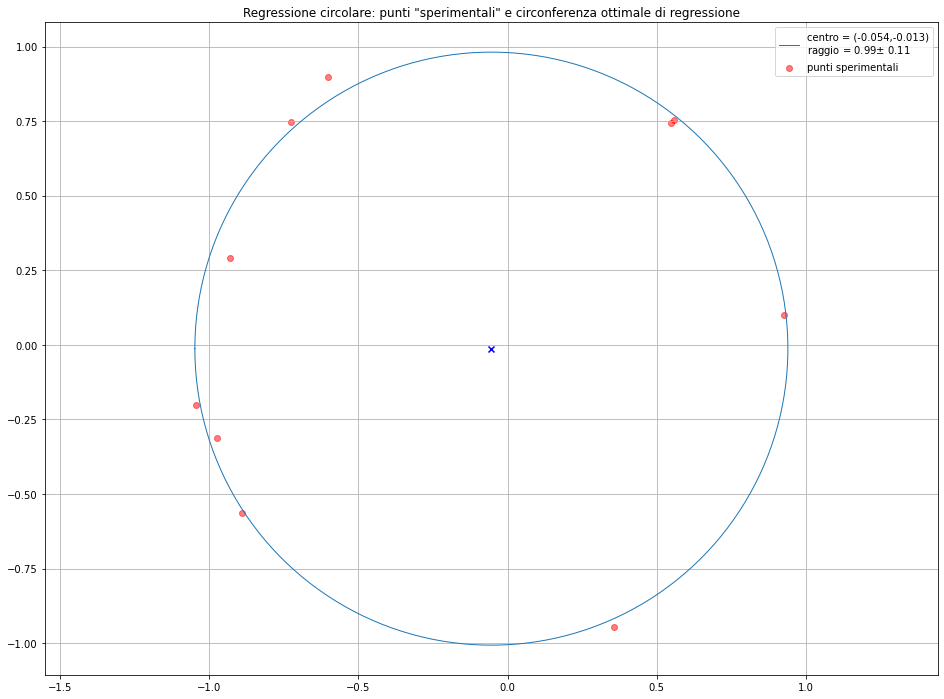

In [6]:
# parte grafica
figura = plt.figure(facecolor = 'white')
plt.rcParams['figure.figsize'] = [16, 12]
plt.axis('equal')
plt.grid()
plt.scatter(xc, yc, c = 'blue', marker = 'x')
xp, yp = ptsCirconferenzaOttimale(xc, yc, r)
plt.scatter(xdata, ydata, c = 'red', alpha = .5, label = 'punti sperimentali', marker = 'o')
plt.plot(xp, yp, linewidth = 1, label = 'centro = ('+ str('%5.3f'%xc) + ',' + str('%5.3f'%yc) + ')\n' + 'raggio = ' + str('%1.2f'%r) + '$\pm$' + str('%5.2f'%residuo))
plt.legend(loc = 'best', labelspacing = 0.5)
plt.title('Regressione circolare: punti "sperimentali" e circonferenza ottimale di regressione')
plt.show()